## 🔎 Pre-processing of [Fake News](https://www.kaggle.com/datasets/algord/fake-news) Dataset

First we'll load our dataset and change some column in order to simplify our dataset. For example, we change the type of the column named "real" into a boolean and we change the name :

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# https://www.kaggle.com/datasets/algord/fake-news
df = pd.read_csv("../local_datasets/FakeNewsNet.csv", sep=",")
df = df.rename(columns={"Unnamed: 0": "id"})
df = df.rename(columns={"real": "is_fake_news"})
df["is_fake_news"] = df["is_fake_news"].map({0: True, 1: False})
df

,title,news_url,source_domain,tweet_num,is_fake_news
0,Kandi Burruss Explodes Over Rape Accusation on...,http://toofab.com/2017/05/08/real-housewives-a...,toofab.com,42,False
1,People's Choice Awards 2018: The best red carp...,https://www.today.com/style/see-people-s-choic...,www.today.com,0,False
2,Sophia Bush Sends Sweet Birthday Message to 'O...,https://www.etonline.com/news/220806_sophia_bu...,www.etonline.com,63,False
3,Colombian singer Maluma sparks rumours of inap...,https://www.dailymail.co.uk/news/article-33655...,www.dailymail.co.uk,20,False
4,Gossip Girl 10 Years Later: How Upper East Sid...,https://www.zerchoo.com/entertainment/gossip-g...,www.zerchoo.com,38,False
...,...,...,...,...,...
23191,Pippa Middleton wedding: In case you missed it...,https://www.express.co.uk/news/royal/807049/pi...,www.express.co.uk,52,False
23192,Zayn Malik & Gigi Hadid’s Shocking Split: Why ...,hollywoodlife.com/2018/03/13/zayn-malik-gigi-h...,hollywoodlife.com,7,True
23193,Jessica Chastain Recalls the Moment Her Mother...,http://www.justjared.com/2018/01/17/jessica-ch...,www.justjared.com,26,False
23194,"Tristan Thompson Feels ""Dumped"" After Khloé Ka...",www.intouchweekly.com/posts/tristan-thompson-f...,www.intouchweekly.com,24,True


### 🧾 Distribution before changes

In [3]:
counts = df['is_fake_news'].value_counts()
fake_news_count = counts.get(True, 0)
real_news_count = counts.get(False, 0)
real_news_percent = (real_news_count / (real_news_count + fake_news_count)) * 100
fake_news_percent = (fake_news_count / (real_news_count + fake_news_count)) * 100
print("Number of real news articles:", real_news_count, "({:.2f}%)".format(real_news_percent))
print("Number of fake news articles:", fake_news_count, "({:.2f}%)".format(fake_news_percent))


Number of real news articles: 17441 (75.19%)
Number of fake news articles: 5755 (24.81%)


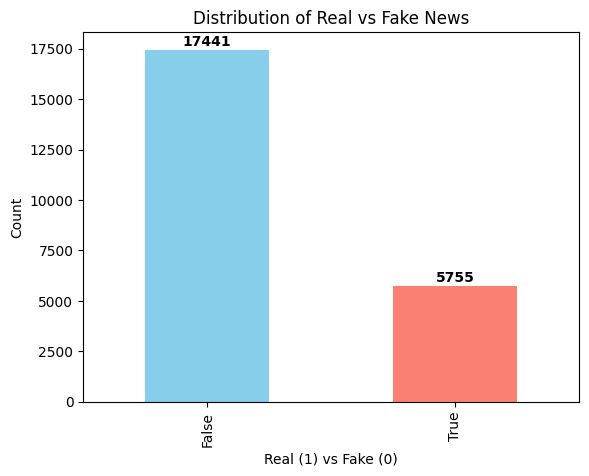

In [4]:
ax = df["is_fake_news"].value_counts().plot(kind="bar", color=["skyblue", "salmon"])
plt.title("Distribution of Real vs Fake News")
plt.xlabel("Real (1) vs Fake (0)")
plt.ylabel("Count")

for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2, # type: ignore
        p.get_height() + 50, # type: ignore
        f"{int(p.get_height())}", # type: ignore
        ha="center",
        va="bottom",   
        fontsize=10,
        fontweight="bold",
        color="black"
    )
    
plt.show()

### 🧾 Deletion of missing values rows

In order to not give missing information to the ChatBot, we make sure to delete the rows that contains missing values : 

In [5]:
print("Before removing missing values:")
print(df.isnull().sum())
print(df.shape)
df = df.dropna()
print("\nAfter removing missing values:")
print(df.isnull().sum())
print(df.shape)

Before removing missing values:
title              0
news_url         330
source_domain    330
tweet_num          0
is_fake_news       0
dtype: int64
(23196, 5)

After removing missing values:
title            0
news_url         0
source_domain    0
tweet_num        0
is_fake_news     0
dtype: int64
(22866, 5)


### 🧾 Deletion of duplicate rows

We also make sure to not give the same news to the ChatBot, so we remove the duplicated rows : 

In [6]:
df = df.drop_duplicates(subset=df.columns.difference(['id']))
print("Size after removing duplicates:", df.shape)

Size after removing duplicates: (22730, 5)


### 🧾 Distribution after changes

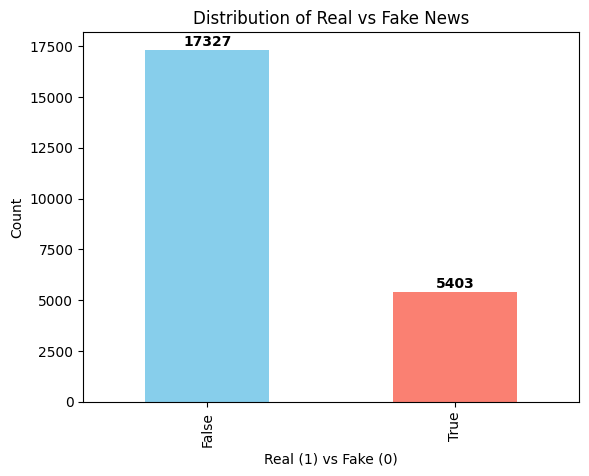

In [7]:
ax = df["is_fake_news"].value_counts().plot(kind="bar", color=["skyblue", "salmon"])
plt.title("Distribution of Real vs Fake News")
plt.xlabel("Real (1) vs Fake (0)")
plt.ylabel("Count")

for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2, # type: ignore
        p.get_height() + 50, # type: ignore
        f"{int(p.get_height())}", # type: ignore
        ha="center",
        va="bottom",   
        fontsize=10,
        fontweight="bold",
        color="black"
    )
    
plt.show()

In [8]:
counts = df['is_fake_news'].value_counts()
fake_news_count = counts.get(True, 0)
real_news_count = counts.get(False, 0)
real_news_percent = (real_news_count / (real_news_count + fake_news_count)) * 100
fake_news_percent = (fake_news_count / (real_news_count + fake_news_count)) * 100
print("Number of real news articles:", real_news_count, "({:.2f}%)".format(real_news_percent))
print("Number of fake news articles:", fake_news_count, "({:.2f}%)".format(fake_news_percent))

Number of real news articles: 17327 (76.23%)
Number of fake news articles: 5403 (23.77%)


After the pre-processing, the distribution is basically the same.

### 🧾 Check domains with most articles after pre-processing

In [10]:
domain_counts = df[df['source_domain'].notna() & (df['source_domain'] != '')]['source_domain'].value_counts().reset_index()
domain_counts.columns = ['source_domain', 'count']
top_20_domains = domain_counts.head(20)['source_domain'].tolist()
analysis_results = []

for domain in top_20_domains:
    domain_df = df[df['source_domain'] == domain]
    
    fake_count = (domain_df['is_fake_news'] == True).sum()
    real_count = (domain_df['is_fake_news'] == False).sum()
    total_count = len(domain_df)
    news_type = "More FAKE news" if fake_count > real_count else ("More REAL news" if real_count > fake_count else "EQUAL")
    
    analysis_results.append({
        'source_domain': domain,
        'total_articles': total_count,
        'fake_news': fake_count,
        'real_news': real_count,
        'type': news_type
    })

analysis_df = pd.DataFrame(analysis_results)
print("Analysis of Top 20 Domains - Fake vs Real News:")
analysis_df

Analysis of Top 20 Domains - Fake vs Real News:


,source_domain,total_articles,fake_news,real_news,type
0,people.com,1779,210,1569,More REAL news
1,www.dailymail.co.uk,957,191,766,More REAL news
2,en.wikipedia.org,734,122,612,More REAL news
3,www.usmagazine.com,704,144,560,More REAL news
4,www.etonline.com,659,74,585,More REAL news
5,www.longroom.com,549,0,549,More REAL news
6,hollywoodlife.com,514,450,64,More FAKE news
7,www.usatoday.com,331,32,299,More REAL news
8,www.hollywoodreporter.com,327,32,295,More REAL news
9,variety.com,303,45,258,More REAL news


As well as the distribution, the top 20 domains are the same except for web.archive.org and www.elle.com where the two switched places.

### 🧾 Save the cleaned dataset

Now, we can save the dataframe in a new CSV file :

In [24]:
output_path = "../local_datasets/FakeNewsNet_cleaned.csv"
df.to_csv(output_path, index=False)
print(f"Saved cleaned DataFrame to: {output_path}")

Saved cleaned DataFrame to: ../local_datasets/FakeNewsNet_cleaned.csv


### 🧾 Conclusion and main outcomes
In this notebook, we made some basics pre-processing tasks in order to clean the dataset:
- Renamed some columns
- Removed the rows that contains missing values
- Removes duplicated rows
- Checked the distribution before and after these tasks